## What is VAR (Vector Autoregression)

Vector Autoregression (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

That means, the basic requirements in order to use VAR are:

  * You need atleast two time series (variables)
  * The time series should influence each other.
  
It is considered as an Autoregressive model because, each variable (Time Series) is modeled as a function of the past values, that is the predictors are nothing but the lags (time delayed value) of the series.

The primary difference is those models are uni-directional, where, the predictors influence the Y and not vice-versa. Whereas, Vector Auto Regression (VAR) is bi-directional. That is, the variables influence each other.

In [1]:
import data_prep_helper
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
do = data_prep_helper.ShiftChartData(chart_col=["Price","High","Low"])

corr_df = do.chart_df


corr_df = corr_df.resample('D').interpolate()

#creating the train and validation set
train = corr_df[:1500]
valid = corr_df[1500:]

train = do.get_causal_const_shift(train)

valid = do.get_causal_const_shift(valid)

In [7]:
train_slice = train[[
                  'bitcoin_Price',
                  'bitcoin_Google_Trends_prev_month',
                  'cryptocurrency_Google_Trends_prev_month',
                  'alibaba_High_prev_month',
                  'amazon_High_prev_month',
                  'economy_pos_sents_prev_month']]

valid_slice = valid[[
                  'bitcoin_Price',
                   'bitcoin_Google_Trends_prev_month',
                  'cryptocurrency_Google_Trends_prev_month',
                  'alibaba_High_prev_month',
                  'amazon_High_prev_month',
                  'economy_pos_sents_prev_month']]
    
model = VAR(endog=train_slice)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

#converting predictions to dataframe

cols = train.columns
valid_pred = pd.DataFrame(prediction, columns=train_slice.columns, index=valid_slice.index)

#check rmse
for i in train_slice.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(valid_pred[i], valid_slice[i])))

rmse value for bitcoin_Price is :  5996.584743324188
rmse value for bitcoin_Google_Trends_prev_month is :  524.9266657574358
rmse value for cryptocurrency_Google_Trends_prev_month is :  36.614100910110665
rmse value for alibaba_High_prev_month is :  46.972303279299446
rmse value for amazon_High_prev_month is :  295.2643301818575
rmse value for economy_pos_sents_prev_month is :  0.016716948548384746


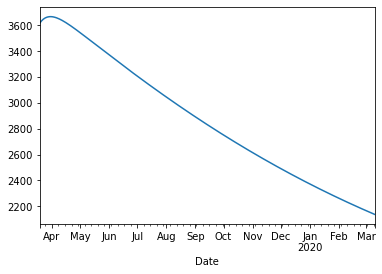

In [9]:
valid_pred["bitcoin_Price"].plot()

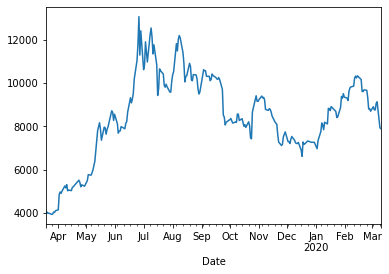

In [10]:
valid_slice["bitcoin_Price"].plot()

In [15]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

#converting predictions to dataframe

#cols = df_cols
valid_pred = pd.DataFrame(prediction, columns=valid_slice.columns, index=valid_slice.index)

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(valid_pred[i], valid_slice[i])))

rmse value for bitcoin_Price is :  5996.584743324188


KeyError: 'bitcoin_High'

In [15]:
#make final predictions
num_forcast = 30
 
model = VAR(endog=corr_df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=num_forcast)

yhat_df = pd.DataFrame(yhat, columns=cols)

forecast_dates = pd.date_range(start=corr_df.index[-1], periods=num_forcast+1)[1:]

yhat_df = yhat_df.set_index(forecast_dates)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/base/wrapper.py:36: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



ValueError: Shape of passed values is (5, 20), indices imply (5, 44)

In [25]:
fig = make_subplots(
    rows=2, 
    cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.2,
    subplot_titles=(["Bitcoin Price Chart<br>with Validation<br>and Forecast",
                     "Bitcoin 30-day-Mean"])
)

fig.add_trace(go.Scatter(x=corr_df.index, 
                         y=corr_df['bitcoin_Price'],
                         name="BITCOIN Closing Price"), row=1, col=1)

fig.add_trace(go.Scatter(x=valid_pred.index, 
                         y=valid_pred['bitcoin_Price'],
                         name="BITCOIN Validation Prediction"), row=1, col=1)

fig.add_trace(go.Scatter(x=yhat_df.index, 
                         y=yhat_df['bitcoin_Price'],
                         name="BITCOIN Current Forecast"), row=1, col=1)

fig.add_trace(go.Scatter(x=corr_df.index, 
                         y=corr_df['bitcoin_30_day_ma'],
                         name="BITCOIN 30 Closing Price"), row=2, col=1)

fig.add_trace(go.Scatter(x=valid_pred.index, 
                         y=valid_pred['bitcoin_30_day_ma'],
                         name="Validation Prediction"), row=2, col=1)

fig.add_trace(go.Scatter(x=yhat_df.index, 
                         y=yhat_df['bitcoin_30_day_ma'],
                         name="Current Forecast"), row=2, col=1)

fig.update_layout(height=1000, width=1500, title_text="Bitcoin Prediction using VAR (Vector Autoregression)")


NameError: name 'yhat_df' is not defined